In [177]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [178]:
# Grab and process the raw data.
#data_path = ("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
 #            "master/sms_spam_collection/SMSSpamCollection"
  #          )


imbd_raw = pd.read_csv('imdb_labelled.txt', sep="\t", header=None)
imbd_raw.columns = [ "review_text",'senti_score']



#sms_raw = pd.read_csv(data, delimiter= '\t', header=None)
#sms_raw.columns = ['spam', 'message']

In [179]:
imbd_raw.head()

,review_text,senti_score
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [180]:
keywords = ['bad', 'horrible', 'wasted', 'horrendous', 'NOTHING','walked out','bored','embarrassing']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    imbd_raw[str(key)] = imbd_raw.review_text.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [181]:
imbd_raw.head()

,review_text,senti_score,bad,horrible,wasted,horrendous,NOTHING,walked out,bored,embarrassing
0,"A very, very, very slow-moving, aimless movie ...",0,False,False,False,False,False,False,False,False
1,Not sure who was more lost - the flat characte...,0,False,False,False,False,False,False,False,False
2,Attempting artiness with black & white and cle...,0,False,False,False,False,False,False,False,False
3,Very little music or anything to speak of.,0,False,False,False,False,False,False,False,False
4,The best scene in the movie was when Gerardo i...,1,False,False,False,False,False,False,False,False


In [182]:
imbd_raw['allcaps'] = sms_raw.message.str.isupper()

In [183]:
imbd_raw['senti_score'] = (imbd_raw['senti_score'] == '0')
# Note that if you run this cell a second time everything will become false.
# So... Don't.

/Users/robertshiles/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


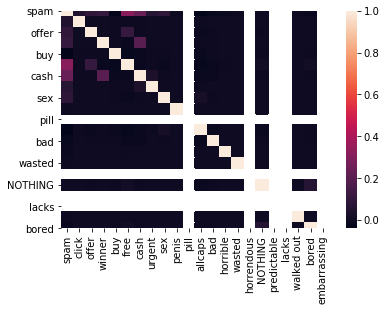

In [184]:
sns.heatmap(sms_raw.corr())

In [185]:
data = imbd_raw[keywords + ['allcaps']]
target = imbd_raw['senti_score']

In [186]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB 

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 748 points : 0


Here I selected the table of Internet Movie Database reviews to go through I selected the words 'bad', 'horrible', 'wasted', 'horrendous', 'NOTHING','walked out','bored','embarrassing' to denote poor reviews 